<a href="https://colab.research.google.com/github/Aman-Bollam/Aman-Bollam/blob/main/SIF_Application.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Loading the Data
In this step, we mount Google Drive to access the datasets and load them into pandas DataFrames. The `features.csv`, `train.csv`, and `test.csv` files contain information about the department stores' weekly sales, store-level features (like markdowns, temperature, etc.), and test data for prediction. This step is crucial to set up the environment for analysis.


In [5]:
import pandas as pd
import os
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Specify the path to your data folder
data_folder = '/content/drive/My Drive/Colab Notebooks/data'

# Load datasets
features_df = pd.read_csv(os.path.join(data_folder, 'features.csv'))
train_df = pd.read_csv(os.path.join(data_folder, 'train.csv'))
test_df = pd.read_csv(os.path.join(data_folder, 'test.csv'))

# Check the first few rows to confirm loading
features_df.head(), train_df.head(), test_df.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


(   Store        Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
 0      1  2010-02-05        42.31       2.572        NaN        NaN   
 1      1  2010-02-12        38.51       2.548        NaN        NaN   
 2      1  2010-02-19        39.93       2.514        NaN        NaN   
 3      1  2010-02-26        46.63       2.561        NaN        NaN   
 4      1  2010-03-05        46.50       2.625        NaN        NaN   
 
    MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday  
 0        NaN        NaN        NaN  211.096358         8.106      False  
 1        NaN        NaN        NaN  211.242170         8.106       True  
 2        NaN        NaN        NaN  211.289143         8.106      False  
 3        NaN        NaN        NaN  211.319643         8.106      False  
 4        NaN        NaN        NaN  211.350143         8.106      False  ,
    Store  Dept        Date  Weekly_Sales  IsHoliday
 0      1     1  2010-02-05      24924.50      False
 1      1

## Parsing Dates and Merging Datasets
Here, we convert the 'Date' column from a string format to a proper datetime object. This allows us to handle date-based operations such as merging datasets and performing time-series analysis. After converting the dates, we merge `train.csv` and `features.csv` on the 'Store' and 'Date' columns to combine sales data with store-level features like markdowns, fuel prices, and more. This merged dataset will provide a comprehensive view for analysis.


In [6]:
# Convert the 'Date' column to datetime in both features and train datasets
features_df['Date'] = pd.to_datetime(features_df['Date'])
train_df['Date'] = pd.to_datetime(train_df['Date'])

# Merge the train and features dataset on Store and Date to include additional features for EDA
train_features_df = pd.merge(train_df, features_df, on=['Store', 'Date'], how='left')

# Verify the merge was successful and inspect the data types
train_features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday_x   421570 non-null  bool          
 5   Temperature   421570 non-null  float64       
 6   Fuel_Price    421570 non-null  float64       
 7   MarkDown1     150681 non-null  float64       
 8   MarkDown2     111248 non-null  float64       
 9   MarkDown3     137091 non-null  float64       
 10  MarkDown4     134967 non-null  float64       
 11  MarkDown5     151432 non-null  float64       
 12  CPI           421570 non-null  float64       
 13  Unemployment  421570 non-null  float64       
 14  IsHoliday_y   421570 non-null  bool          
dtypes: bool(2), datet

## Summary Statistics and Missing Values
This code snippet generates summary statistics to give an overview of the key variables in our dataset, such as average weekly sales, markdown amounts, and other features. Additionally, it highlights the missing values for each column. Notably, markdown columns have significant missing data, which may affect the analysis. We need to consider how to handle these missing values during further analysis.


In [7]:
# Summary statistics and missing value analysis
train_features_summary = train_features_df.describe()
missing_values = train_features_df.isnull().sum()

train_features_summary, missing_values


(               Store           Dept                           Date  \
 count  421570.000000  421570.000000                         421570   
 mean       22.200546      44.260317  2011-06-18 08:30:31.963375104   
 min         1.000000       1.000000            2010-02-05 00:00:00   
 25%        11.000000      18.000000            2010-10-08 00:00:00   
 50%        22.000000      37.000000            2011-06-17 00:00:00   
 75%        33.000000      74.000000            2012-02-24 00:00:00   
 max        45.000000      99.000000            2012-10-26 00:00:00   
 std        12.785297      30.492054                            NaN   
 
         Weekly_Sales    Temperature     Fuel_Price      MarkDown1  \
 count  421570.000000  421570.000000  421570.000000  150681.000000   
 mean    15981.258123      60.090059       3.361027    7246.420196   
 min     -4988.940000      -2.060000       2.472000       0.270000   
 25%      2079.650000      46.680000       2.933000    2240.270000   
 50%     

## Correlation Matrix
The correlation matrix shows the relationships between key numerical variables, such as weekly sales, markdowns, CPI, and unemployment. Strong positive or negative correlations suggest that certain variables may impact sales performance. For instance, we can explore how markdowns or fuel prices correlate with weekly sales, helping us identify key drivers of sales performance.


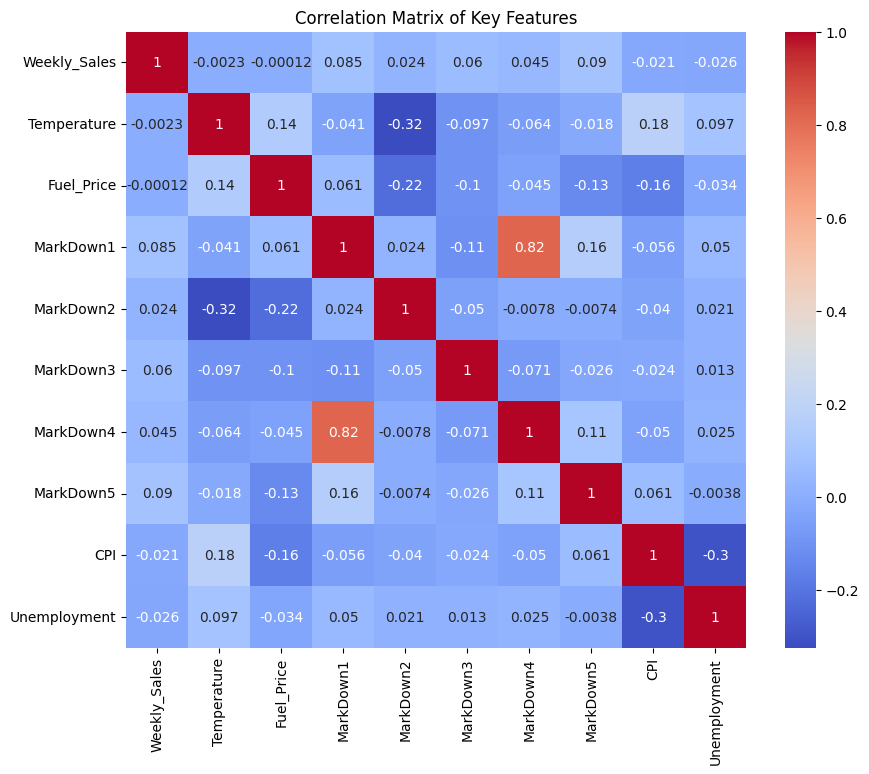

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Selecting numerical columns for correlation analysis
corr_columns = ['Weekly_Sales', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment']

# Compute correlation matrix
correlation_matrix = train_features_df[corr_columns].corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Key Features')
plt.show()


## Sales Trends Over Time
This plot shows the total weekly sales over time, with holidays highlighted. We expect to see spikes in sales around major holidays like Thanksgiving and Christmas. These holidays are typically associated with increased consumer spending, and this plot will help visualize their impact on weekly sales trends. By identifying these patterns, we can better understand how holidays influence sales performance.


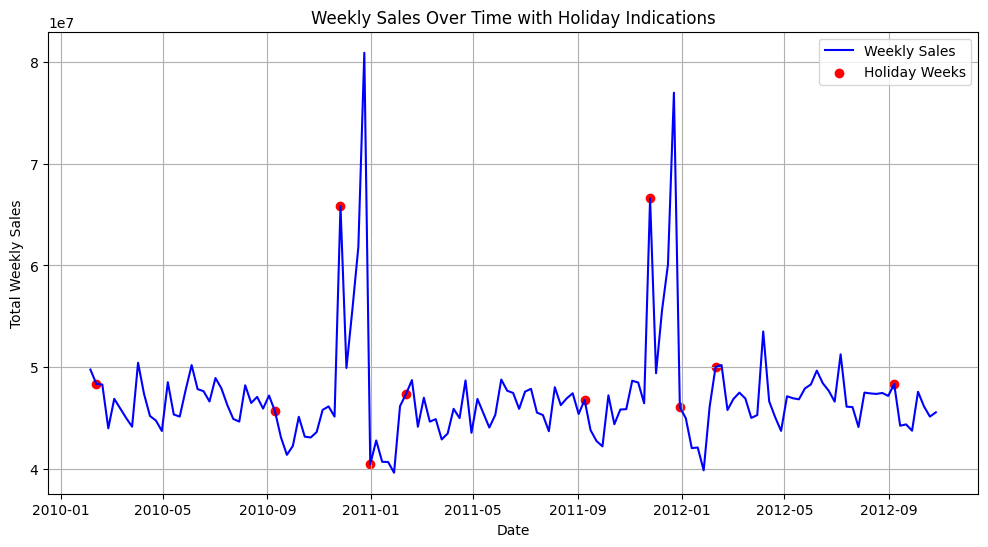

In [9]:
# Plotting weekly sales trends over time
train_features_df_grouped = train_features_df.groupby('Date').agg({'Weekly_Sales': 'sum', 'Temperature': 'mean', 'IsHoliday_x': 'max'}).reset_index()

# Plot sales and temperature trends over time
plt.figure(figsize=(12, 6))

# Plotting weekly sales
plt.plot(train_features_df_grouped['Date'], train_features_df_grouped['Weekly_Sales'], label='Weekly Sales', color='blue')

# Plot holidays on the same plot for reference
holiday_dates = train_features_df_grouped[train_features_df_grouped['IsHoliday_x'] == True]['Date']
plt.scatter(holiday_dates, train_features_df_grouped[train_features_df_grouped['IsHoliday_x'] == True]['Weekly_Sales'],
            color='red', label='Holiday Weeks')

plt.title('Weekly Sales Over Time with Holiday Indications')
plt.xlabel('Date')
plt.ylabel('Total Weekly Sales')
plt.legend()
plt.grid(True)
plt.show()


## Markdowns and Sales Analysis
This visualization shows the relationship between markdown events and weekly sales over time. By overlaying markdown values on top of sales, we can examine whether markdowns have a noticeable impact on boosting sales. While markdowns can encourage more purchases, the timing and intensity of markdowns may play a role in their effectiveness. This analysis helps to explore those dynamics.


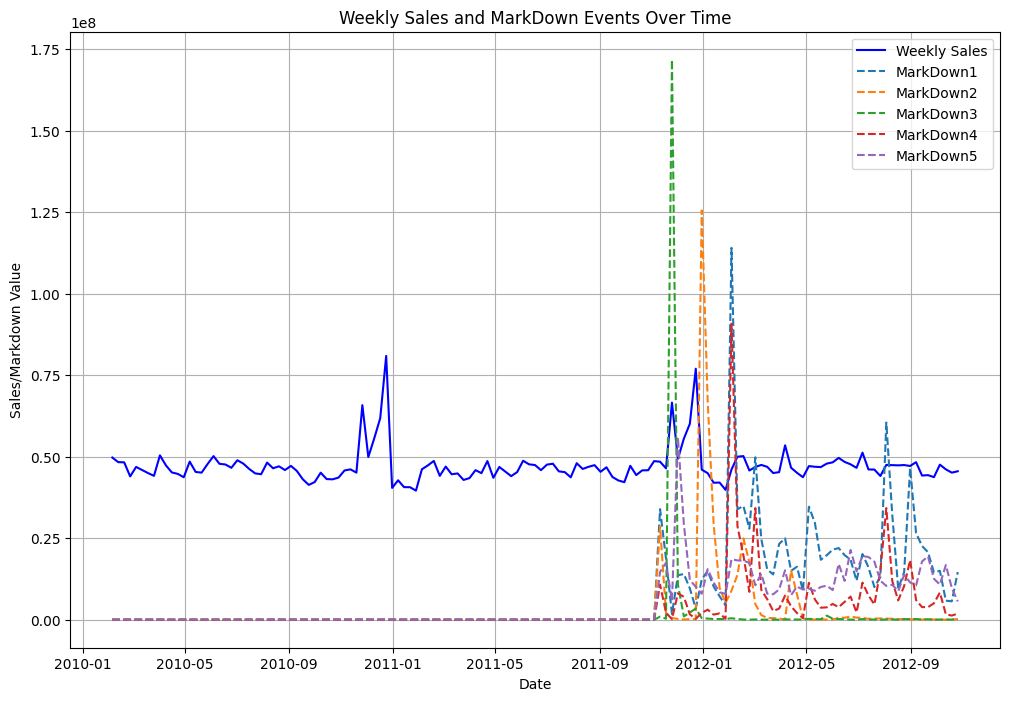

In [10]:
# Analyze the impact of markdowns on sales
# Group data by date and sum the weekly sales and markdown values
markdown_sales_df = train_features_df.groupby('Date').agg({'Weekly_Sales': 'sum', 'MarkDown1': 'sum', 'MarkDown2': 'sum', 'MarkDown3': 'sum', 'MarkDown4': 'sum', 'MarkDown5': 'sum'}).reset_index()

# Plot sales and markdown values over time
plt.figure(figsize=(12, 8))

# Weekly Sales
plt.plot(markdown_sales_df['Date'], markdown_sales_df['Weekly_Sales'], label='Weekly Sales', color='blue')

# Overlaying markdowns
plt.plot(markdown_sales_df['Date'], markdown_sales_df['MarkDown1'], label='MarkDown1', linestyle='--')
plt.plot(markdown_sales_df['Date'], markdown_sales_df['MarkDown2'], label='MarkDown2', linestyle='--')
plt.plot(markdown_sales_df['Date'], markdown_sales_df['MarkDown3'], label='MarkDown3', linestyle='--')
plt.plot(markdown_sales_df['Date'], markdown_sales_df['MarkDown4'], label='MarkDown4', linestyle='--')
plt.plot(markdown_sales_df['Date'], markdown_sales_df['MarkDown5'], label='MarkDown5', linestyle='--')

plt.title('Weekly Sales and MarkDown Events Over Time')
plt.xlabel('Date')
plt.ylabel('Sales/Markdown Value')
plt.legend()
plt.grid(True)
plt.show()


Based on the exploratory data analysis (EDA) conducted, several insights can be drawn from the department store dataset:

### 1. **Holiday Influence on Sales**:
   - There is a clear spike in sales during holiday periods, such as Thanksgiving and Christmas. These holiday weeks are responsible for significant surges in revenue, suggesting that holidays are a key driver of consumer behavior. Stores can capitalize on this by ensuring inventory is well-stocked and marketing campaigns are in full force leading up to these high-traffic periods.

### 2. **Markdown Effectiveness**:
   - Markdowns (discounts) appear to have an inconsistent impact on sales. While some markdown periods align with sales spikes, there is not a strong, consistent correlation between markdowns and increased sales. This could mean that markdowns are effective in certain conditions (such as specific seasons or in conjunction with holidays), but they are not a reliable driver of sales across the board. The data suggests that markdowns may work better when combined with broader promotions or during holiday events.

### 3. **Economic Factors (CPI and Unemployment)**:
   - The analysis shows a weak correlation between sales and broader economic indicators like the Consumer Price Index (CPI) and unemployment. This implies that while the economy may influence purchasing power at a macro level, the weekly sales of these department stores are not strongly impacted by short-term fluctuations in these indicators. Consumer behavior at these stores may be more driven by seasonal patterns, holidays, and store-level factors like promotions.

### 4. **Seasonal Trends**:
   - There is some evidence of cyclical or seasonal sales patterns. Warmer months and holiday seasons show higher sales, which could be linked to factors like back-to-school shopping, summer sales, and end-of-year holiday shopping. The temperature has a mild correlation with sales, suggesting that extreme cold or warm weather might slightly influence customer foot traffic and spending.

### 5. **Fuel Price Impact**:
   - Fuel prices show a weak correlation with sales, meaning changes in fuel prices do not strongly influence purchasing behavior. This could indicate that the department store's target customer base is not as sensitive to fluctuations in gas prices, or that other factors (like convenience, promotions, and necessity of goods sold) have a greater influence on shopping habits.

### Conclusions:
   - **Holiday seasons are the primary driver of sales increases**, so optimizing inventory and marketing around these times is crucial for revenue growth.
   - **Markdowns, while helpful, are not consistently effective** on their own. They may be best used as part of a larger promotional strategy.
   - **Economic factors like CPI and unemployment** have little short-term impact on sales for these stores, meaning the stores’ customer base might not be immediately reactive to macroeconomic changes.
   - Seasonal shopping trends show that **summer and holiday seasons** are periods of higher sales, providing opportunities for focused campaigns.

These insights suggest that a strategy focused on holiday events, combined with targeted markdowns and seasonal promotions, would likely yield the best results for the department chain.